In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
import os

warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)


In [2]:
#Reading Dataset and putting it in Dataframe
cir_df = pd.read_csv('../Dataset/circuits.csv')
rlt_df = pd.read_csv('../Dataset/results.csv')
st_df = pd.read_csv('../Dataset/status.csv')
dr_df = pd.read_csv('../Dataset/drivers.csv')
rc_df = pd.read_csv('../Dataset/races.csv')
con_df = pd.read_csv('../Dataset/constructors.csv')
consd_df = pd.read_csv('../Dataset/constructor_standings.csv')
lt_df = pd.read_csv('../Dataset/lap_times.csv')
qli_df = pd.read_csv('../Dataset/qualifying.csv')
pd.get_option('display.max_columns', None)

Win Count for top 5 teams each year

In [3]:
#Combining datasets to get the data fro ploting
import plotly.graph_objects as go
merged_df = pd.merge(rc_df[['raceId', 'year']], consd_df, on='raceId', how='left')
merged_df = pd.merge(merged_df, con_df[['constructorId', 'name']], on='constructorId', how='left')

#Filtering Merged dataframe and giving unique Constructor ID for the teams we want
filtered_df = merged_df[merged_df['constructorId'].isin([1, 3, 6, 9, 131])]
filtered_df.head()

,raceId,year,constructorStandingsId,constructorId,points,position,positionText,wins,name
0,1,2009,4046.0,6.0,0.0,9.0,9,0.0,Ferrari
2,1,2009,4045.0,9.0,0.0,8.0,8,0.0,Red Bull
5,1,2009,4041.0,3.0,3.0,4.0,4,0.0,Williams
9,2,2009,8541.0,6.0,0.0,10.0,10,0.0,Ferrari
10,2,2009,8540.0,9.0,1.5,7.0,7,0.0,Red Bull


In [4]:
#Cleaning data by removing the columns we dont need.

filtered_df.drop(['raceId','constructorStandingsId','points','position','positionText'],axis=1).reset_index()

,index,year,constructorId,wins,name
0,0,2009,6.0,0.0,Ferrari
1,2,2009,9.0,0.0,Red Bull
2,5,2009,3.0,0.0,Williams
3,9,2009,6.0,0.0,Ferrari
4,10,2009,9.0,0.0,Red Bull
...,...,...,...,...,...
3477,13325,2024,9.0,7.0,Red Bull
3478,13326,2024,6.0,2.0,Ferrari
3479,13327,2024,131.0,2.0,Mercedes
3480,13328,2024,1.0,1.0,McLaren


In [5]:
#Sorting data with year filter
years = sorted(filtered_df['year'].unique())
teams = filtered_df['name'].unique()

t5_df = pd.DataFrame(index=teams,columns=years)
t5_df

,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Ferrari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Red Bull,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
McLaren,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mercedes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Looping through 5 teams we are searching

for index,row in filtered_df.iterrows():
    year=row['year']
    name=row['name']
    wins=row['wins']
    
    if name in t5_df.index and year in t5_df.columns:
        t5_df.at[name,year] = wins
t5_df[2023] = {'Ferrari':1.0, 'Red Bull':21.0, 'Williams':0, 'McLaren':0, 'Mercedes':0}
#Printing dataframe
t5_df

,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Ferrari,2.0,2.0,1.0,5.0,0.0,1.0,3.0,0.0,2.0,0.0,1.0,0.0,4.0,2.0,1.0,0.0,3.0,6.0,6.0,4.0,5.0,6.0,0.0,2.0,3.0,4.0,1.0,2.0,0.0,2.0,1.0,3.0,6.0,0.0,0.0,0.0,1.0,1.0,3.0,5.0,6.0,6.0,10.0,9.0,15.0,8.0,15.0,1.0,9.0,9.0,8.0,1.0,5.0,1.0,3.0,2.0,0.0,3.0,0.0,5.0,6.0,3.0,0.0,0.0,4.0,1.0,2.0
Red Bull,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,9.0,12.0,7.0,13.0,3.0,0.0,2.0,3.0,4.0,3.0,2.0,11.0,17.0,21.0,7.0
Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,5.0,6.0,4.0,1.0,1.0,1.0,4.0,9.0,9.0,0.0,2.0,2.0,7.0,10.0,10.0,7.0,5.0,12.0,8.0,0.0,0.0,0.0,4.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
McLaren,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,1.0,3.0,4.0,3.0,6.0,3.0,0.0,0.0,0.0,1.0,4.0,1.0,12.0,6.0,4.0,3.0,15.0,10.0,6.0,8.0,5.0,5.0,0.0,0.0,0.0,3.0,9.0,7.0,7.0,4.0,1.0,2.0,1.0,10.0,0.0,8.0,6.0,2.0,5.0,6.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Mercedes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,3.0,16.0,16.0,19.0,12.0,11.0,15.0,13.0,9.0,1.0,0.0,2.0


In [7]:
#ccreating line plot with the dataframe to visulise the wins by teams each year
import plotly.express as px

t5_df_melted = t5_df.reset_index().melt(id_vars='index', var_name='Year', value_name='Win Count')

#Giving indivual team colours
individual_colors = ['#d62728', '#0b5394', '#6fa8dc', '#ff7f0e', '#14f8dd']

#Creating plots using plotly express
fig = px.line(t5_df_melted, x='Year', y='Win Count', color='index',
              #Giving labels for the plot
              labels={'Year': 'Year', 'Win Count': 'Win Count', 'index': 'Team'},
              #Giving Titles
              title='Wins by Year for Top 5 Teams',
              hover_data={'index': True, 'Win Count': True},
              #Using team colour
              color_discrete_sequence=individual_colors)

fig.update_layout(hovermode='closest')

fig.update_xaxes(range=[t5_df_melted['Year'].min()-1,t5_df_melted['Year'].max()+1],dtick=5)
fig.update_yaxes(range=[0, t5_df_melted['Win Count'].max() + 1], dtick=1)
fig.update_traces(mode='markers+lines')

#Plot dimension
fig.update_layout(width=950,height=600)
#Show the plot
fig.show()

Drivers and their Nationality (Entire history)

In [8]:
#Creating Data frame to get the unique country names
nationality_counts = dr_df['nationality'].value_counts().reset_index()

#Giving two column names
nationality_counts.columns = ['nationality','count']

#Showing data in decending
nationality_counts = nationality_counts.sort_values(by='count',ascending=False)

#Showing the dataframe
nationality_counts

,nationality,count
0,British,166
1,American,158
2,Italian,99
3,French,73
4,German,50
5,Brazilian,32
6,Argentine,24
7,Swiss,23
8,Belgian,23
9,South African,23


In [9]:
#Creating pie chat to show the nationality and count of drivers
fig = px.pie(
    names=nationality_counts['nationality'],
    values=nationality_counts['count'],
    #Title
    title='Distribution of Driver Nationalities',
    hover_data=[],
    labels={'names': 'Nationality', 'values': 'Count'})

#Pulling the values that has count of less than 10 to show it more visibily

pull_values = [0.2 if count <= 10 else 0 for count in nationality_counts['count']]
fig.update_traces(textinfo='none', pull=pull_values)  

fig.update_layout(
    showlegend=True,
    legend=dict(
        orientation='h',  
        yanchor='top', 
        y=0, 
        xanchor='auto', 
        x=0.5,
        traceorder='normal',  
        tracegroupgap=10      
    ),
    height=700,  
    width=1000,
    title=dict(
        #Pie chart Title
        text='Distribution of F1 Driver Nationalities',
        y=0.95,
        x=0.5,
        yanchor='top'  
    )
)
#Showing pie chart
fig.show()


Home Finish v/s Average Finish Plots

In [10]:
#Reading data needed and putting it in dataframe
circuits = pd.read_csv('../Dataset/circuits.csv')
quali = pd.read_csv('../Dataset/qualifying.csv')
races = pd.read_csv('../Dataset/races.csv')
drivers = pd.read_csv('../Dataset/drivers.csv')
results = pd.read_csv('../Dataset/results.csv')

In [11]:
#Function to get average finish time

def findAverageFinish(data):
    avg = data.loc[:, data.columns.intersection(['driverId','positionOrder'])]
    avg = avg.groupby('driverId')

    total = avg.count()
    avg = avg.mean()

    avg['totalRaces'] = total
    avg.rename(columns={'positionOrder':'averageFinish'}, inplace=True)
    
    return avg

In [12]:
#Showing average finish time for each driver
avgPerform = findAverageFinish(results)
avgPerform

,averageFinish,totalRaces
driverId,,
1,4.950581,344
2,10.722826,184
3,8.252427,206
4,8.431122,392
5,13.285714,112
...,...,...
856,15.272727,11
857,9.088235,34
858,16.303030,33


In [13]:
#Nationality for drivers
nationalityCountry = {'Australian': 'Australia', 'Malaysian': 'Malaysia',
                      'Spanish': 'Spain', 'Monegasque': 'Monaco', 'Canadian': 'Canada',
                      'French': 'France', 'British': 'UK', 'German': 'Germany',
                      'East German': 'Germany', 'Hungarian': 'Hungary', 'Belgian': 'Belgium',
                      'Italy': 'Italian', 'Japanese': 'Japan', 'Chinese': 'China',
                      'Brazilian': 'Brazil', 'American': 'USA', 'Austrian': 'Austria',
                      'Mexican': 'Mexico', 'Dutch': 'Netherlands', 'Indian': 'India',
                      'Russian': 'Russia', 'Portuguese': 'Portugual', 'Argentine': 'Argentina',
                      'South African': 'South Africa', 'Swedish': 'Sweden',
                      'Swiss':'Switzerland'}

#Merging dataframes for races result
homePerform = pd.merge(results, races, left_on='raceId', right_on='raceId')

#Merging Home performance and circuit
homePerform = pd.merge(homePerform, circuits, left_on='circuitId', right_on='circuitId')

#Merging home performace by drivers
homePerform = pd.merge(homePerform, drivers, left_on='driverId', right_on='driverId')

homePerform = homePerform.loc[:, homePerform.columns.intersection(['driverId', 'positionOrder','nationality','country'])]
homePerform['homeRace'] = homePerform['nationality'].map(nationalityCountry) == homePerform['country']
homePerform = homePerform.drop(homePerform[homePerform['homeRace'] == False].index)

homePerform = findAverageFinish(homePerform)
homePerform.rename(columns={'averageFinish':'averageHomeFinish', 'totalRaces': 'totalHomeRaces'}, inplace=True)
homePerform

,averageHomeFinish,totalHomeRaces
driverId,,
1,2.947368,19
2,11.352941,17
3,9.090909,11
4,7.769231,26
6,15.000000,2
...,...,...
852,11.666667,3
853,18.000000,1
855,14.000000,1


In [14]:
#Merging entire dataframe with driver and nationality
perform = pd.merge(avgPerform, homePerform, left_on='driverId', right_on='driverId')
perform = pd.merge(perform, drivers, left_on='driverId', right_on='driverId')
perform = perform.loc[:, perform.columns.intersection(['driverId', 'averageFinish', 'totalRaces', 'averageHomeFinish', 'totalHomeRaces', 'nationality'])]

#Getting perfromance difference 
perform['performanceDifference'] = perform['averageFinish'] - perform['averageHomeFinish']
perform

,driverId,averageFinish,totalRaces,averageHomeFinish,totalHomeRaces,nationality,performanceDifference
0,1,4.950581,344,2.947368,19,British,2.003213
1,2,10.722826,184,11.352941,17,German,-0.630115
2,3,8.252427,206,9.090909,11,German,-0.838482
3,4,8.431122,392,7.769231,26,Spanish,0.661892
4,6,13.083333,36,15.000000,2,Japanese,-1.916667
...,...,...,...,...,...,...,...
561,852,13.435897,78,11.666667,3,Japanese,1.769231
562,853,17.863636,22,18.000000,1,Russian,-0.136364
563,855,14.428571,56,14.000000,1,Chinese,0.428571
564,857,9.088235,34,6.000000,2,Australian,3.088235


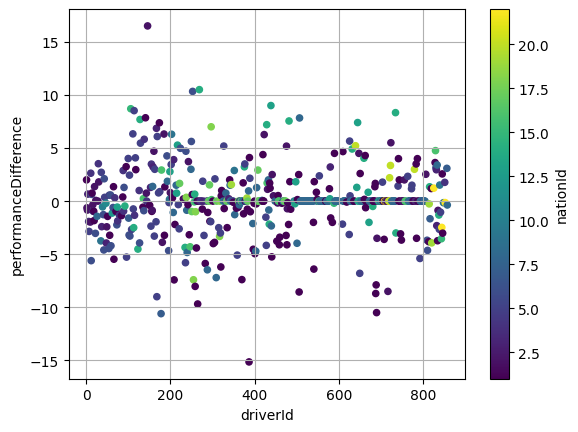

In [15]:
#Creating dictonary of country and country code
nationalityId = {'British': 1, 'German': 2, 'Spanish': 3, 'Japanese': 4, 'French': 5,
                 'Brazilian': 6, 'Australian': 7, 'American': 8, 'Canadian': 9, 'Indian': 10,
                'Hungarian': 11, 'Malaysian': 12, 'Argentine': 13, 'Belgian': 14,
                 'Monegasque': 15, 'Dutch': 16, 'South African': 17, 'Swedish': 18,
                 'Mexican': 19, 'Swiss': 20, 'East German': 21, 'Russian': 22}

perform['nationId'] = perform['nationality'].map(nationalityId)

#Creating scatter plot
ax1 = perform.plot.scatter(x='driverId',
                      y='performanceDifference',
                      c='nationId')

#Taking the high and low and create a range 
perform.head()
ax1.grid()

In [16]:
#Calculating correlation coefficient
from scipy.stats import pearsonr, linregress

corr_coefficient, pvalue = pearsonr(perform['averageFinish'], perform['averageHomeFinish'])
print('Correlation Coefficient (r-value):', corr_coefficient)

slope, intercept, _, _, _ = linregress(perform['averageFinish'], perform['averageHomeFinish'])
print('Equation of the fit line: y =', slope, 'x +', intercept)

#Calculating standard deviation
std_dev = np.std(perform[['averageFinish','averageHomeFinish']], axis=0)
print('Standard Deviation for averageFinish and averageHomeFinish:', std_dev[0], std_dev[1])

Correlation Coefficient (r-value): 0.8835852076246559
Equation of the fit line: y = 0.995156046564515 x + 0.110046133561152
Standard Deviation for averageFinish and averageHomeFinish: 5.793354940040074 6.524885374636513


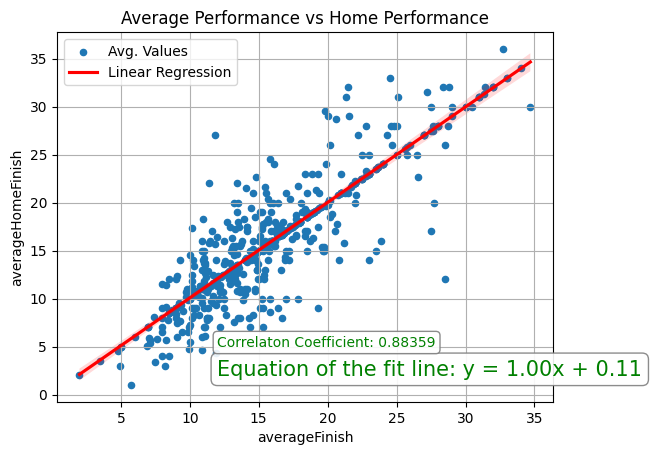

In [17]:
import seaborn as sns

#Creating another scatter plot with correlation coefficient
ax1 = perform.plot.scatter(x='averageFinish',
                      y='averageHomeFinish', title='Average Performance vs Home Performance', label="Avg. Values")

#Giving data for X and Y axis
sns.regplot(x='averageFinish',
            y='averageHomeFinish',
            data=perform,
            scatter=False,
            ax=ax1, color='red', label="Linear Regression")

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
equation_text = 'Equation of the fit line: y = {:.2f}x + {:.2f}'.format(slope, intercept)
corr_text = "Correlaton Coefficient: {:.5f}".format(corr_coefficient)
ax1.text(12, 2, equation_text, color="green",size=15, bbox=bbox_props)
ax1.text(12, 5, corr_text, color="green",size=10, bbox=bbox_props)

ax1.legend()
ax1.grid()

In [18]:
#Reading data
import os
for dirname, _, filenames in os.walk('../Dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Dataset/circuits.csv
../Dataset/constructors.csv
../Dataset/constructor_results.csv
../Dataset/constructor_standings.csv
../Dataset/drivers.csv
../Dataset/driver_standings.csv
../Dataset/lap_times.csv
../Dataset/pit_stops.csv
../Dataset/qualifying.csv
../Dataset/races.csv
../Dataset/results.csv
../Dataset/seasons.csv
../Dataset/sprint_results.csv
../Dataset/status.csv


In [19]:
#Creatig a list of available dataframes
dataset = {}
for i in os.listdir("../Dataset/"):
    dataset[i.replace(".csv","_df")] = pd.read_csv(os.path.join("../Dataset",i ))
print(f'list of dfs available : {dataset.keys()}')

list of dfs available : dict_keys(['circuits_df', 'constructors_df', 'constructor_results_df', 'constructor_standings_df', 'drivers_df', 'driver_standings_df', 'lap_times_df', 'pit_stops_df', 'qualifying_df', 'races_df', 'results_df', 'seasons_df', 'sprint_results_df', 'status_df'])


In [20]:
#Diving deep inti team data (RedBull)
constructorId = 9

#Filtering dataset and selecting redbull data only
filtered_results_df = dataset["results_df"][dataset["results_df"]["constructorId"] == constructorId]

races_participated = list(set(filtered_results_df["raceId"].tolist()))
races_participated.sort()

#(race_id , year)
years_participated = [] 
for i in races_participated:
    years_participated.append((i,int(dataset["races_df"].loc[dataset["races_df"]["raceId"] == i, "year"].values)))

#Printing the entry year of Redbull in formula one
entry_year = min([x[1] for x in years_participated])
print(f'RedBull started racing from year {entry_year}')

RedBull started racing from year 2005


In [21]:
#Creating single dataframe with all the data we need
driverStandingDf = dataset['results_df'][(dataset['results_df']['constructorId'] == constructorId) &(dataset['results_df']['positionOrder'] <= 3)]

#Only printing 10 data
driverStandingDf.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
130,131,24,14,9,9,13,3,3,3,6.0,70,+23.352,5807579,36,7,1:18.085,201.057,1
568,569,45,17,9,15,6,3,3,3,6.0,60,+1:05.674,7652032,29,8,1:34.449,196.220,1
876,877,59,14,9,14,7,3,3,3,6.0,78,+52.298,6275414,45,19,1:17.849,154.452,1
7593,7594,3,20,9,15,1,1,1,1,10.0,56,1:57:43.485,7063485,42,2,1:52.627,174.235,1
7594,7595,3,17,9,14,3,2,2,2,8.0,56,+10.970,7074455,42,4,1:52.980,173.690,1
7614,7615,4,20,9,15,3,2,2,2,8.0,57,+7.187,5515369,16,4,1:34.756,205.614,1
7635,7636,5,17,9,14,5,3,3,3,6.0,66,+13.924,5853126,18,5,1:23.112,201.631,1
7674,7675,7,17,9,14,4,2,2,2,8.0,58,+6.714,5191562,42,3,1:27.809,218.847,1
7675,7676,7,20,9,15,1,3,3,3,6.0,58,+7.461,5192309,51,2,1:27.622,219.314,1
7693,7694,8,20,9,15,1,1,1,1,10.0,60,1:22:49.328,4969328,16,1,1:20.735,229.238,1


In [22]:
driverIdsAndNoOfPodiums = {}

#Creating function to calculate the number of podiums by each redbull drivers 
def getDriverNameFromId(driverId):
    filtered_df = dataset['drivers_df'][(dataset['drivers_df']['driverId'] == driverId)][['forename','surname']]
    full_name = filtered_df['forename'] + " " + filtered_df['surname']
    return full_name.values[0]

for index, row in driverStandingDf.iterrows():
    try:
        driverIdsAndNoOfPodiums[row['driverId']] +=1
    except:
        driverIdsAndNoOfPodiums[row['driverId']] =1

#Creating dictonary for redbull driver ids and podiums
driverIdsAndNoOfPodiums = dict(sorted(driverIdsAndNoOfPodiums.items(), key=lambda item: item[1], reverse=True))
names_ = [getDriverNameFromId(driverId) for driverId in driverIdsAndNoOfPodiums.keys()]
podiums_ = list(driverIdsAndNoOfPodiums.values())

#Printing the list
print(driverIdsAndNoOfPodiums)

{830: 107, 20: 65, 17: 41, 817: 29, 815: 29, 14: 2, 826: 2, 848: 2}


Top 5 Redbull drivers of all time : 
Max Verstappen have total 107 podiums for Redbull Racing
Sebastian Vettel have total 65 podiums for Redbull Racing
Mark Webber have total 41 podiums for Redbull Racing
Daniel Ricciardo have total 29 podiums for Redbull Racing
Sergio Pérez have total 29 podiums for Redbull Racing


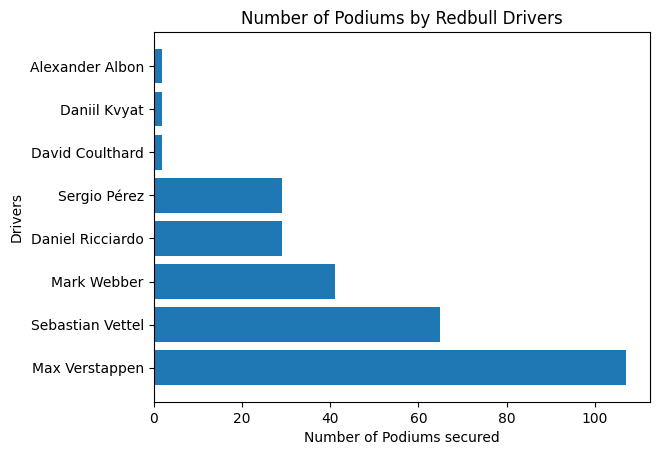

In [23]:
#Printing top 3 drivers of redull by podiums
print(f"Top 5 Redbull drivers of all time : ")

#Looping through it 5 times
for i in range(5):
    print(f"{names_[i]} have total {podiums_[i]} podiums for Redbull Racing")

#Creating horizontal bar graph
plt.barh(names_, podiums_)

#Add labels and title for the bar graph
plt.xlabel('Number of Podiums secured')
plt.ylabel('Drivers')
plt.title('Number of Podiums by Redbull Drivers')

# Show the plot
plt.show()


Max Verstappen

In [24]:
#Selecting Max Verstappen
max_verstappen_driverId = 830

#Diving deeper into indiviudal driver starting with Max Verstappen
quali_filtered_df = dataset["qualifying_df"][(dataset["qualifying_df"]['constructorId'] == constructorId) & (dataset["qualifying_df"]['driverId'] == max_verstappen_driverId)]
quali_filtered_df.head()
filtired_df = pd.merge(quali_filtered_df, dataset["results_df"], on= ['raceId','driverId','constructorId' ])
filtired_df.head(20)

,qualifyId,raceId,driverId,constructorId,number_x,position_x,q1,q2,q3,resultId,number_y,grid,position_y,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,6774,952,830,9,33,4,1:23.578,1:23.178,1:23.087,23005,33,4,1,1,1,25.0,66,1:41:40.017,6100017,36,6,1:28.816,188.682,1
1,6813,953,830,9,33,21,1:22.467,\N,\N,23044,33,0,\N,R,18,0.0,34,\N,\N,34,18,1:26.563,138.779,3
2,6819,954,830,9,33,5,1:14.601,1:13.793,1:13.414,23052,33,5,4,4,4,12.0,70,+53.020,5518316,49,4,1:16.319,205.710,1
3,6844,955,830,9,33,9,1:44.939,1:44.387,1:45.570,23078,33,9,8,8,8,4.0,51,+1:10.696,5643062,50,3,1:46.973,202.021,1
4,6866,956,830,9,33,9,1:07.131,1:06.866,1:11.153,23094,33,8,2,2,2,18.0,71,+5.719,5263826,69,5,1:09.618,223.700,1
5,6882,957,830,9,33,3,1:31.305,1:30.697,1:30.313,23116,33,3,2,2,2,18.0,52,+8.250,5704081,41,6,1:36.407,219.979,1
6,6904,958,830,9,33,4,1:40.424,1:22.660,1:20.557,23141,33,4,5,5,5,10.0,70,+48.659,6078774,40,7,1:24.687,186.234,1
7,6926,959,830,9,33,4,1:15.875,1:15.124,1:14.834,23161,33,4,3,3,3,15.0,67,+13.413,5457613,47,4,1:18.910,208.673,1
8,6946,960,830,9,33,2,1:48.407,1:47.163,1:46.893,23191,33,2,11,11,11,0.0,44,+1:11.138,6362196,32,7,1:53.281,222.582,1
9,6972,961,830,9,33,7,1:23.229,1:22.857,1:22.411,23209,33,7,7,7,7,6.0,53,+54.236,4702325,50,8,1:26.405,241.361,1


In [25]:
race_position = filtired_df['positionOrder'].to_list()
quali_position = filtired_df['position_x'].to_list()

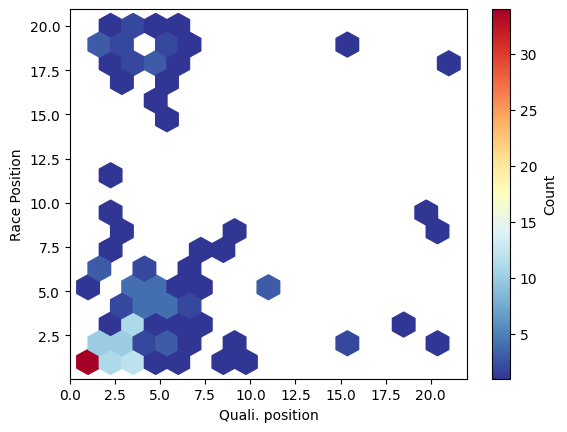

In [26]:
#Creating hexagonal Scatter plot for Max Verstappen
plt.hexbin(quali_position, race_position, gridsize=16, cmap='RdYlBu_r', mincnt=1)

#Adding labels and title
plt.colorbar(label='Count')
plt.xlabel('Quali. position')
plt.ylabel('Race Position')


#Show the plot
plt.show()

In [27]:
#Creating dataframes
fnames = []
fpaths = []
for dirname, _, filenames in os.walk('../Dataset'):
    for filename in filenames:
        fnames.append(filename.split('.')[0])
        fpaths.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

../Dataset\circuits.csv
../Dataset\constructors.csv
../Dataset\constructor_results.csv
../Dataset\constructor_standings.csv
../Dataset\drivers.csv
../Dataset\driver_standings.csv
../Dataset\lap_times.csv
../Dataset\pit_stops.csv
../Dataset\qualifying.csv
../Dataset\races.csv
../Dataset\results.csv
../Dataset\seasons.csv
../Dataset\sprint_results.csv
../Dataset\status.csv


In [28]:
#File path and dataframes
fpath = '../Dataset/'
circuits = pd.read_csv(f'{fpath}circuits.csv', index_col=0, na_values=r'\N')
constructorResults = pd.read_csv(f'{fpath}constructor_results.csv', index_col=0, na_values=r'\N')
constructors = pd.read_csv(f'{fpath}constructors.csv', index_col=0, na_values=r'\N')
constructorStandings = pd.read_csv(f'{fpath}constructor_standings.csv', index_col=0, na_values=r'\N')
drivers = pd.read_csv(f'{fpath}drivers.csv', index_col=0, na_values=r'\N')
driverStandings = pd.read_csv(f'{fpath}driver_standings.csv', index_col=0, na_values=r'\N')
lapTimes = pd.read_csv(f'{fpath}lap_times.csv')
pitStops = pd.read_csv(f'{fpath}pit_stops.csv')
qualifying = pd.read_csv(f'{fpath}qualifying.csv', index_col=0, na_values=r'\N')
races = pd.read_csv(f'{fpath}races.csv', na_values=r'\N')
results = pd.read_csv(f'{fpath}results.csv', index_col=0, na_values=r'\N')
seasons = pd.read_csv(f'{fpath}seasons.csv', index_col=0, na_values=r'\N')
status = pd.read_csv(f'{fpath}status.csv', index_col=0, na_values=r'\N')

In [29]:
#Creating variable with data
circuits = circuits.rename(columns={'name':'circuitName','location':'circuitLocation','country':'circuitCountry','url':'circuitUrl'})
drivers = drivers.rename(columns={'number':'driverNumber','nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
constructors = constructors.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})
races['date'] = races['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
races = races.rename(columns={'year':'raceYear','name':'raceName','date':'raceDate','time':'raceTime','url':'raceUrl','round':'raceRound'})
lapTimes = lapTimes.rename(columns={'time':'lapTime','position':'lapPosition','milliseconds':'lapMilliseconds'})
lapTimes['lapSeconds'] = lapTimes['lapMilliseconds'].apply(lambda x: x/1000)
pitStops = pitStops.rename(columns={'time':'pitTime','milliseconds':'pitMilliseconds'})
pitStops['pitSeconds'] = pitStops['pitMilliseconds'].apply(lambda x: x/1000)
results = results.rename(columns={'position':'resultsPosition','time':'resultsTime','milliseconds':'resultsMilliseconds','number':'resultsNumber'})
results['resultsSeconds'] = results['resultsMilliseconds'].apply(lambda x: x/1000)

In [30]:
#Creating dictionary with team and colours for the plot
constructor_color_map = {
    'Toro Rosso':'#0000FF',
    'Mercedes':'#6CD3BF',
    'Red Bull':'#1E5BC6',
    'Ferrari':'#ED1C24',
    'Williams':'#37BEDD',
    'Force India':'#FF80C7',
    'Virgin':'#c82e37',
    'Renault':'#FFD800',
    'McLaren':'#F58020',
    'Sauber':'#006EFF',
    'Lotus':'#FFB800',
    'HRT':'#b2945e',
    'Caterham':'#0b361f',
    'Lotus F1':'#FFB800',
    'Marussia':'#6E0000',
    'Manor Marussia':'#6E0000',
    'Haas F1 Team':'#B6BABD',
    'Racing Point':'#F596C8',
    'Aston Martin':'#2D826D',
    'Alfa Romeo':'#B12039',
    'AlphaTauri':'#4E7C9B',
    'Alpine F1 Team':'#2293D1'
}

In [31]:

#Merging data into single dataframe wiuth all data
resultsAnalysis = pd.merge(results,races,left_on='raceId',right_on='raceId',how='left')
resultsAnalysis = pd.merge(resultsAnalysis,circuits,left_on='circuitId',right_index=True,how='left')
resultsAnalysis = pd.merge(resultsAnalysis,constructors,left_on='constructorId',right_index=True,how='left')
resultsAnalysis = pd.merge(resultsAnalysis,drivers,left_on='driverId',right_index=True,how='left')
resultsAnalysis

,raceId,driverId,constructorId,resultsNumber,grid,resultsPosition,positionText,positionOrder,points,laps,resultsTime,resultsMilliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,resultsSeconds,raceYear,raceRound,circuitId,raceName,raceDate,raceTime,raceUrl,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,circuitName,circuitLocation,circuitCountry,lat,lng,alt,circuitUrl,constructorRef,constructorName,constructorNationality,constructorUrl,driverRef,driverNumber,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1,5690.616,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1,5696.094,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1,5698.779,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1,5707.797,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1,5708.630,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,1132,839,214,31.0,18,16.0,16,16,0.0,50,NaN,NaN,46.0,16.0,1:30.875,233.371,12,NaN,2024,12,9,British Grand Prix,2024-07-07,14:00:00,https://en.wikipedia.org/wiki/2024_British_Gra...,2024-07-05,11:30:00,2024-07-05,15:00:00,2024-07-06,10:30:00,2024-07-06,14:00:00,NaN,NaN,silverstone,Silverstone Circuit,Silverstone,UK,52.0786,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team

In [32]:
#Merging data to creating lap time analysis dataframe
lapTimesAnalysis = pd.merge(lapTimes,races,left_on='raceId',right_on='raceId',how='left')
lapTimesAnalysis = pd.merge(lapTimesAnalysis,resultsAnalysis,left_on=['raceId','driverId','raceYear','raceRound','circuitId','raceName','raceUrl'],right_on=['raceId','driverId','raceYear','raceRound','circuitId','raceName','raceUrl'],how='left')
lapTimesAnalysis

,raceId,driverId,lap,lapPosition,lapTime,lapMilliseconds,lapSeconds,raceYear,raceRound,circuitId,raceName,raceDate_x,raceTime_x,raceUrl,fp1_date_x,fp1_time_x,fp2_date_x,fp2_time_x,fp3_date_x,fp3_time_x,quali_date_x,quali_time_x,sprint_date_x,sprint_time_x,constructorId,resultsNumber,grid,resultsPosition,positionText,positionOrder,points,laps,resultsTime,resultsMilliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,resultsSeconds,raceDate_y,raceTime_y,fp1_date_y,fp1_time_y,fp2_date_y,fp2_time_y,fp3_date_y,fp3_time_y,quali_date_y,quali_time_y,sprint_date_y,sprint_time_y,circuitRef,circuitName,circuitLocation,circuitCountry,lat,lng,alt,circuitUrl,constructorRef,constructorName,constructorNationality,constructorUrl,driverRef,driverNumber,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,841,20,1,1,1:38.109,98109,98.109,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1.0,1,1.0,1,1,25.0,58,1:29:30.259,5370259.0,44.0,4.0,1:29.844,212.488,1,5370.259,2011-03-27,06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Sebastian Vettel
1,841,20,2,1,1:33.006,93006,93.006,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1.0,1,1.0,1,1,25.0,58,1:29:30.259,5370259.0,44.0,4.0,1:29.844,212.488,1,5370.259,2011-03-27,06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Sebastian Vettel
2,841,20,3,1,1:32.713,92713,92.713,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1.0,1,1.0,1,1,25.0,58,1:29:30.259,5370259.0,44.0,4.0,1:29.844,212.488,1,5370.259,2011-03-27,06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Sebastian Vettel
3,841,20,4,1,1:32.803,92803,92.803,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1.0,1,1.0,1,1,25.0,58,1:29:30.259,5370259.0,44.0,4.0,1:29.844,212.488,1,5370.259,2011-03-27,06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Sebastian Vettel
4,841,20,5,1,1:32.342,92342,92.342,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1.0,1,1.0,1,1,25.0,58,1:29:30.259,5370259.0,44.0,4.0,1:29.844,212.488,1,5370.259,2011-03-27,06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,vettel,5.0,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,Seba

Each Lap time for each driver in Monaco in 2021

In [33]:
#Giving year name
year = 2021

#Giving circuit name
circuitName = lapTimesAnalysis['circuitName'].unique()[5]
driverList = lapTimesAnalysis[(lapTimesAnalysis['raceYear']==year)]['driverName'].unique()

In [34]:
#Creating dataframe with laptime analysis and filtering with year and circuit
df = lapTimesAnalysis[(lapTimesAnalysis['raceYear']==year)&(lapTimesAnalysis['circuitName']==circuitName)&(lapTimesAnalysis['driverName'].isin(driverList))][['raceYear','lap','lapSeconds','driverName','circuitName','constructorName']]

#Labels
fig = px.line(
    data_frame = df,
    x='lap',
    y='lapSeconds',
    color='driverName',
)

fig.update_layout(
    title_text=f'Lap time by Each drivers in {circuitName} {year}',
)

#Showing plot
fig.show()

Average Lap time per circuit over the years

In [35]:
import plotly.express as px

#Removing rows with missing lapSeconds
lapTimesAnalysis = lapTimesAnalysis.dropna(subset=['lapSeconds'])

#Grouping data by circuitName and raceYear, calculate mean lapSeconds, and reset index
grouped_data = lapTimesAnalysis.groupby(['circuitName', 'raceYear'], as_index=False)['lapSeconds'].mean()

#Creating the line plot using Plotly Express
fig = px.line(grouped_data,
              x='raceYear',
              y='lapSeconds',
              color='circuitName',
              title='Average Lap Times by Circuit and Year',
              labels={'raceYear': 'Race Year', 'lapSeconds': 'Average Lap Time (seconds)'}
             )

fig.update_layout(
    title_text='Average Lap Times Over Years by Circuit',
)

#Showing the plot
fig.show()